# wyniki testów

In [1]:
import sys
sys.path.append('../main_model')

from some_functions import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from plots import barplot

In [29]:
results = get_db(r'test_results')
results.head(1)

,model,user,number_of_recomm,train_articles,test_articles,precision,recall
0,popularity,1,5,2,3,0.0,0.0


In [30]:
results.groupby(['number_of_recomm','model'])[['precision','recall']].mean().reset_index()

,number_of_recomm,model,precision,recall
0,5,author,0.030431,0.011558
1,5,department,0.032558,0.013297
2,5,final,0.059059,0.027138
3,5,popularity,0.142142,0.056928
4,10,author,0.028314,0.020162
5,10,department,0.031853,0.026193
6,10,final,0.053220,0.046902
7,10,popularity,0.081081,0.065706
8,15,author,0.026994,0.028334
9,15,department,0.030115,0.037103


In [28]:
# results[results['train_articles']<3].groupby(['model','user'])['train_articles'].count()
# results[results['test_articles']<3].groupby(['model','user'])['test_articles'].min()
# user id: 0 for each model

In [31]:
# wyrzucam, jeśli w którymś ze zbiorów było mniej niż 3 artykuły użytkownika
results = results[(results['test_articles'] > 2) & (results['train_articles'] > 2)]
results.groupby(['number_of_recomm','model'])[['precision','recall']].mean().reset_index()

,number_of_recomm,model,precision,recall
0,5,author,0.030648,0.011641
1,5,department,0.033552,0.013398
2,5,final,0.060728,0.026152
3,5,popularity,0.148674,0.057534
4,10,author,0.028515,0.020305
5,10,department,0.032713,0.025833
6,10,final,0.055355,0.046559
7,10,popularity,0.084836,0.066303
8,15,author,0.027186,0.028536
9,15,department,0.030951,0.036761


### precision and recalls for models, from every possible number of recommendations

model
author        0.028783
department    0.032405
final         0.056274
popularity    0.098456
Name: precision, dtype: float64


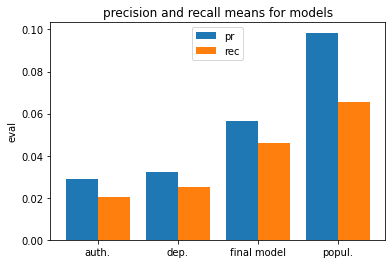

In [32]:
pre = results.groupby(['model'])['precision'].mean()
rec = results.groupby(['model'])['recall'].mean()
print(pre)
y = [pre.values,rec.values]
x_names = ['auth.','dep.','final model','popul.']
bar_names = ['pr','rec']
barplot(y,x_names,bar_names,width=0.4,y_name='eval',title='precision and recall means for models')

#### % of users without recommendation for model

In [33]:
# a = results.groupby(['model','user']).agg({'number_of_recomm': 'max'})
# # a.count() # 1001
# a = a[a['number_of_recomm']==0] 
# a.groupby(['model']).agg({'number_of_recomm': 'count'})
# # odejmuje 1, bo to uzytkownik testowy bez niczego (powinno być NaN w tabeli)

# alternatywnie
a = results.groupby(['model','user']).agg({'precision': 'max'})
a[a['precision'].isna()].reset_index().groupby(['model']).count()['user']

model
author        521
department     29
Name: user, dtype: int64

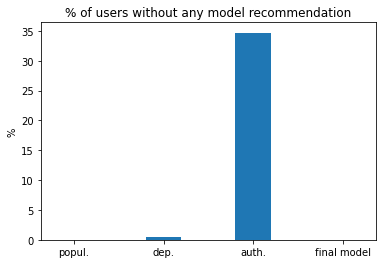

In [11]:
y = [[0,0.5,34.7,0]]
x_names = ['popul.','dep.','auth.','final model']
bar_names = ['pr']
barplot(y,x_names,bar_names,width=0.4,title='% of users without any model recommendation',legend=False, y_name='%')

In [12]:
m5 = results[results['number_of_recomm']==5]
m10 = results[results['number_of_recomm']==10]
m15 = results[results['number_of_recomm']==15]

m5.groupby(['model'])[['precision','recall']].describe().reset_index()

model precision                                               recall  \
                  count      mean       std  min  25%  50%  75%  max   count   
0      author     649.0  0.130663  0.168324  0.0  0.0  0.0  0.2  0.8   649.0   
1  department     993.0  0.043505  0.096096  0.0  0.0  0.0  0.0  0.6   993.0   
2       final    1000.0  0.064000  0.116609  0.0  0.0  0.0  0.2  0.8  1000.0   
3  popularity    1000.0  0.146000  0.169684  0.0  0.0  0.2  0.2  0.8  1000.0   

                                                               
       mean       std  min  25%       50%       75%       max  
0  0.021987  0.031990  0.0  0.0  0.000000  0.037037  0.250000  
1  0.007926  0.020303  0.0  0.0  0.000000  0.000000  0.166667  
2  0.013222  0.029271  0.0  0.0  0.000000  0.020833  0.285714  
3  0.026706  0.037054  0.0  0.0  0.020833  0.042553  0.333333

In [13]:
m10.groupby(['model'])[['precision','recall']].describe().reset_index()

model precision                                               recall  \
                  count      mean       std  min  25%  50%  75%  max   count   
0      author     641.0  0.111544  0.110359  0.0  0.0  0.1  0.2  0.6   641.0   
1  department     993.0  0.041793  0.068212  0.0  0.0  0.0  0.1  0.4   993.0   
2       final    1000.0  0.061900  0.081394  0.0  0.0  0.0  0.1  0.4  1000.0   
3  popularity    1000.0  0.095900  0.100714  0.0  0.0  0.1  0.2  0.5  1000.0   

                                                            
       mean       std  min  25%       50%       75%    max  
0  0.037134  0.040888  0.0  0.0  0.027778  0.058824  0.375  
1  0.015958  0.030443  0.0  0.0  0.000000  0.024390  0.200  
2  0.025382  0.041181  0.0  0.0  0.000000  0.040000  0.400  
3  0.035005  0.042879  0.0  0.0  0.026316  0.051282  0.400

In [14]:
m15.groupby(['model'])[['precision','recall']].describe().reset_index()

model precision                                                    \
                  count      mean       std  min  25%       50%       75%   
0      author     628.0  0.099045  0.084983  0.0  0.0  0.066667  0.133333   
1  department     993.0  0.040013  0.056173  0.0  0.0  0.000000  0.066667   
2       final    1000.0  0.059467  0.064473  0.0  0.0  0.066667  0.066667   
3  popularity    1000.0  0.077400  0.077300  0.0  0.0  0.066667  0.133333   

             recall                                                    \
        max   count      mean       std  min  25%       50%       75%   
0  0.600000   628.0  0.049879  0.048195  0.0  0.0  0.043478  0.071864   
1  0.333333   993.0  0.022766  0.036336  0.0  0.0  0.000000  0.037037   
2  0.333333  1000.0  0.035844  0.045355  0.0  0.0  0.024390  0.052987   
3  0.400000  1000.0  0.041712  0.046321  0.0  0.0  0.035714  0.062500   

             
        max  
0  0.375000  
1  0.222222  
2  0.400000  
3  0.400000

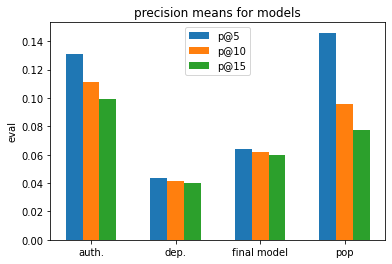

In [15]:
def mn(db,name):
    return db.groupby(['model'])[name].mean()

y = [mn(m5,'precision').values, mn(m10,'precision').values, mn(m15,'precision')]
x_names = ['auth.','dep.','final model','pop']
bar_names = ['p@5','p@10','p@15']
barplot(y,x_names,bar_names,width=0.2,y_name='eval',title='precision means for models')

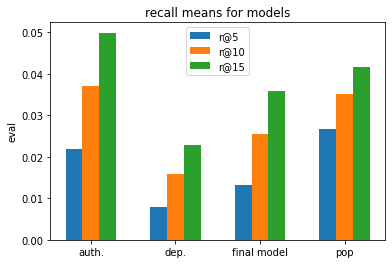

In [16]:
y = [ mn(m5,'recall').values, mn(m10,'recall').values,  mn(m15,'recall').values]
x_names = ['auth.','dep.','final model','pop']
bar_names = ['r@5','r@10','r@15']
barplot(y,x_names,bar_names,width=0.2,y_name='eval',title='recall means for models')


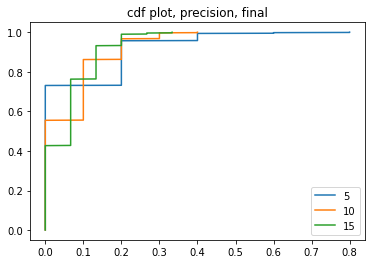

In [21]:
# precision 
def cdf_plots(q,name,model_name):
    for i in q:
        p = results[ (results['number_of_recomm']==i ) 
                    & (results['model']==model_name) ].loc[:,name].values[1:]
        p.sort()
        y = np.linspace(1,len(p),len(p))/len(p)
        plt.plot(p,y,label=str(i))
    plt.legend()
    plt.title(f'cdf plot, {name}, {model_name}')
    plt.show()

q = [5,10,15]
# cdf_plots(q,'precision','popularity')
cdf_plots(q,'precision','final')

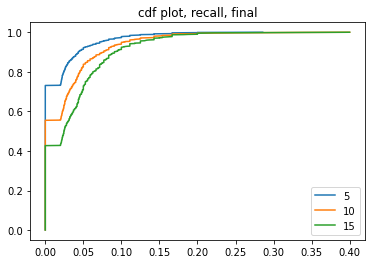

In [22]:
# recall
cdf_plots(q,'recall','final')